# Backpropagation Lab





In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from tabulate import tabulate

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [4]:
#Iris with no regularization
PATH_TO_IRIS_ARFF = 'datasets/iris.arff'

iris_arff = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_arff[0])

X = iris_df.iloc[:, :-1].values
y = pd.get_dummies(iris_df.iloc[:, -1])

print(y)

y = y.to_numpy()

num_iter_to_converge = []
training_set_accuracy = []
test_set_accuracy = []

softmax_probability = None

for i in range(5):
  clf = MLPClassifier(
    hidden_layer_sizes=[64], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf.fit(X_train, y_train)
  num_iter_to_converge.append(clf.n_iter_)
  training_set_accuracy.append(clf.score(X_train, y_train))
  test_set_accuracy.append(clf.score(X_test, y_test))

  
  if i == 0:
    softmax_probability = clf.predict_proba(X_test)

print(f'Average number of iterations to converge: {np.mean(num_iter_to_converge)}')
print(f'Average training set accuracy: {np.mean(training_set_accuracy)}')
print(f'Average test set accuracy: {np.mean(test_set_accuracy)}')

print('Softmax probabilities for the first run:\n', softmax_probability)

     b'Iris-setosa'  b'Iris-versicolor'  b'Iris-virginica'
0              True               False              False
1              True               False              False
2              True               False              False
3              True               False              False
4              True               False              False
..              ...                 ...                ...
145           False               False               True
146           False               False               True
147           False               False               True
148           False               False               True
149           False               False               True

[150 rows x 3 columns]
Average number of iterations to converge: 335.0
Average training set accuracy: 0.9683333333333334
Average test set accuracy: 0.9666666666666666
Softmax probabilities for the first run:
 [[4.25540460e-06 4.90554198e-02 9.74698948e-01]
 [4.34975093e-03 9.97510684e-01 4.

*Discussion*

The model takes on average 309 iterations to converge. This means that on average, the classifier runs for 309 epochs before not improving. Note that we are using the n_iter_no_change hyperparameter and setting it to 50, meaning that the classifier will run for 50 iterations without improvement, so in reality, the model stopped improving at 259 iterations. 

The average training set accuracy is .983. This means that the model correctly classifies 98.3% of the training set after it has been trained. This is a good rate of accuracy, but it is important to note that the model is being trained on the training set, so it is expected to have a high accuracy.

The average test set accuracy is .953. This means that the model correctly classifies 95.3% of the test set. This is a good rate of accuracy. The test set consists of data that the model has not seen before, so we expect the accuracy to be lower than the training set accuracy. However, the rate is still high, so the model is generalizing well.

The softmax probabilities shown above are the probabilities that the given instance is a member of each output class. Each row in the softmax 2d array has 3 elements corresponding to the probabilities of the instance being a member of each class. The highest probability is the class that the model predicts the instance to be a member of. For example, the first row in the softmax array has a probability of .00024 for the first class, .993 for the second class, and .0019 for the third class. This means that the model predicts the instance to be a member of the second class. 

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

Average number of iterations to converge: 112.0
Average training set accuracy: 0.925
Average test set accuracy: 0.9133333333333333
Average best validation score: 0.9466666666666667


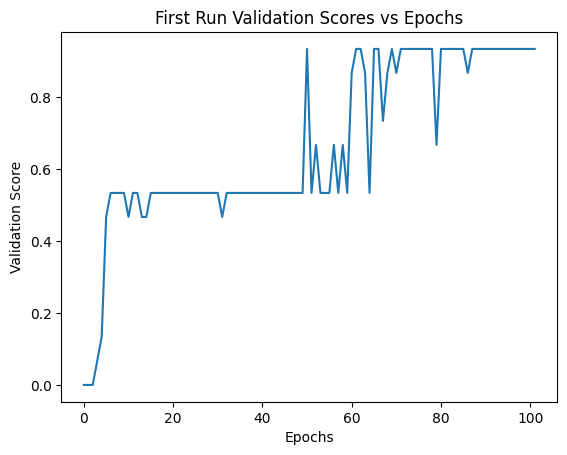

In [15]:
#Iris with early stopping and validation scores graph
PATH_TO_IRIS_ARFF = 'datasets/iris.arff'

iris_arff = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_arff[0])

X = iris_df.iloc[:, :-1].values
y = pd.get_dummies(iris_df.iloc[:, -1].values).to_numpy()

num_iter_to_converge = []
training_set_accuracy = []
test_set_accuracy = []
best_validation_scores = []

run_1_validation_scores = None
run_1_epochs = None

for i in range(5):
  clf = MLPClassifier(
    hidden_layer_sizes=[64], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000,
    early_stopping=True, validation_fraction=.125
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf.fit(X_train, y_train)
  num_iter_to_converge.append(clf.n_iter_)
  training_set_accuracy.append(clf.score(X_train, y_train))
  test_set_accuracy.append(clf.score(X_test, y_test))
  best_validation_scores.append(clf.best_validation_score_)

  if i == 0:
    run_1_validation_scores = clf.validation_scores_
    run_1_epochs = clf.n_iter_

print(f'Average number of iterations to converge: {np.mean(num_iter_to_converge)}')
print(f'Average training set accuracy: {np.mean(training_set_accuracy)}')
print(f'Average test set accuracy: {np.mean(test_set_accuracy)}')
print(f'Average best validation score: {np.mean(best_validation_scores)}')

# Validation scores graph
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
plt.title('First Run Validation Scores vs Epochs')
plt.plot(range(run_1_epochs), run_1_validation_scores)




*Discussion of average values above and the validation score graph*

The average number of iterations until convergence is 112. This means that on average, the classifier runs for 112 epochs before not improving. Again, we are using the n_iter_no_change hyperparameter.

The average training set accuracy is .925. This means that the model correctly classifies 92.5% of the training set after it has been trained. This is a good rate of accuracy, but similar to above, the model is being trained on the training set, so it is expected to have a high accuracy.

The average test set accuracy is .913. This means that the model correctly classifies 91.3% of the test set. This is also a good rate of accuracy. 
As the problem description states, the benefits of early stopping are likely not as apparent in this dataset. The iris dataset is simple and has little noise, so the model is likely to converge quickly and not overfit. Because the iris dataset is so simple, it is surprising that the test set accuracy is not even higher. Being just above 90% does not seem to be a good result for this dataset, and it seems to be struggling to generalize. My hypothesis is that this is because there are not enough instances in the dataset to train the model well.

The average best validation score is .947. On each epoch of training, the model is tested against the validation set and scored. We trained 5 different times, and each time, the model had a best validation score. These 5 best validation scores were averaged to get the average best validation score. On average, across different training and test splits, the model had a best validation score of .947, which is a good rate of accuracy. As the graph shows, the validation scores increased from 0 to .947 over the course of training for a given train test split. This is expected, as the model is being trained and therefore should be improving.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

+------------------------+------------------------------------+-------------------------+---------------------+-------------------+
|   Regularization Value |   Number of Iterations to Converge |   Training Set Accuracy |   Test Set Accuracy |   Best Loss Value |
+========================+====================================+=========================+=====================+===================+
|                 0.1    |                                164 |                0.658333 |            0.566667 |          1.62431  |
+------------------------+------------------------------------+-------------------------+---------------------+-------------------+
|                 0.01   |                                225 |                0.958333 |            0.966667 |          0.797233 |
+------------------------+------------------------------------+-------------------------+---------------------+-------------------+
|                 0.001  |                                258 |             

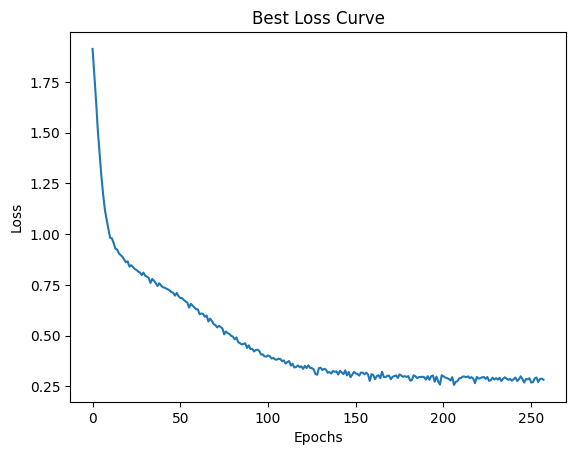

In [16]:
#Iris with Loss Regularization 
PATH_TO_IRIS_ARFF = 'datasets/iris.arff'

iris_arff = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_arff[0])

X = iris_df.iloc[:, :-1].values
y = pd.get_dummies(iris_df.iloc[:, -1].values).to_numpy()

regularization_values = [.1, .01, .001, .0001, .00001]

table_head = ['Regularization Value', 'Number of Iterations to Converge', 'Training Set Accuracy', 'Test Set Accuracy', 'Best Loss Value']
table_results = []

best_loss_curve = None
best_test_accuracy = 0

for i in range(5):
  clf = MLPClassifier(
    hidden_layer_sizes=[64], activation='logistic', solver='sgd',
    alpha=regularization_values[i], batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf.fit(X_train, y_train)
  table_results.append([regularization_values[i], clf.n_iter_, clf.score(X_train, y_train), clf.score(X_test, y_test), clf.best_loss_])
  if clf.score(X_test, y_test) > best_test_accuracy:
    best_test_accuracy = clf.score(X_test, y_test)
    best_loss_curve = clf.loss_curve_


print(tabulate(table_results, headers=table_head, tablefmt='grid'))

# plot best loss curve
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Best Loss Curve')
plt.plot(range(len(best_loss_curve)), best_loss_curve)



*Discussion and comparison between no regularization, early stopping and loss regularization*

The regularization value that gave the best results was .00001. This regularization value gave the lowest loss value. It is interesting to me that this regularization value did not actually give the best test set accuracy, which was 1 (given by multiple other regularization values). I believe this is simply due to random sampling of the train and test sets, as .97 is still quite close to 1. 

1.1 deals with no regularization. 1.2 deals with early stopping. 1.3 deals with loss regularization. No regularization means that the model is not penalized for having large weights, and it can lead to overfitting. Early stopping means that the model uses a validation set when training and stops training when the validation set accuracy stops improving. This can help avoid overfitting because the weights have less time to grow. Loss regularization means that the model drives weights to be small (sometimes 0), which helps avoid overfitting. This also helps in feature reduction, because features that are not important will have weights driven to 0 and can then be removed from the dataset or model.

1.1 had a test set accuracy of .953. 1.2 had a test set accuracy of .913. 1.3 had a test set accuracy of 1. This means that the model with loss regularization had the best test accuracy. It is surprising to me that the model with no regularization and no early stopping (1.1) outperformed the model with early stopping (1.2). I suspect that this is due to the simplicity of the iris dataset, and the fact that the model is not likely to overfit either way, and this is just a random result for a certain train test split. The model with loss regularization performed the best, which makes sense. It is my hypothesis that the model pushed some weights to be 0, which helped the model generalize better.



## 2 Hyperparameters 
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum. 

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

In [36]:
PATH_TO_IRIS_ARFF = 'datasets/iris.arff'
iris_arff = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_arff[0])

PATH_TO_VOWEL_ARFF = 'datasets/vowel.arff'
vowel_arff = arff.loadarff(PATH_TO_VOWEL_ARFF)
vowel_df = pd.DataFrame(vowel_arff[0])

iris_baseline_accuracy = iris_df['class'].value_counts().max() / iris_df.shape[0]
vowel_baseline_accuracy = vowel_df['Class'].value_counts().max() / vowel_df.shape[0]

print(f'Iris Baseline Accuracy: {iris_baseline_accuracy}')
print(f'Vowel Baseline Accuracy: {vowel_baseline_accuracy}')

Iris Baseline Accuracy: 0.3333333333333333
Vowel Baseline Accuracy: 0.09090909090909091



*Discuss these items here*

The iris baseline accuracy is .333, which is expected because there are 3 evenly distributed output classes. The vowel baseline accuracy is .0909, which is expected because there are 11 evenly distributed output classes (1/11 = .0909). The vowel dataset has 11 classes while the iris dataset has 3. The vowel dataset will likely have a lower accuracy because there are more classes to choose from, and as such, the softmax probabilities will be lower and more spread out. Also, because the vowel dataset has a lower baseline accuracy, when the model is forced to make a guess, it will be less likely to guess correctly. In addition, it has some noisy features that are not relevant to the classification task. 

Features in the vowel dataset that are not relevant to the classification task are the first 3 features, which are 'Train or Test', 'Speaker Number', and 'Sex'. These features are simply metadata that mark identifying information about the instance and are not helpful in classifying instances. They are noisy features that only make classification harder. As such, they should not be used in training.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [18]:
PATH_TO_VOWEL_ARFF = 'datasets/vowel.arff'
vowel_arff = arff.loadarff(PATH_TO_VOWEL_ARFF)
vowel_df = pd.DataFrame(vowel_arff[0])
vowel_df = vowel_df.drop(columns=['Train or Test', 'Speaker Number', 'Sex'], axis=1)

table_head = ['Learning Rate', '# Epochs', 'Training Set Accuracy', 'Test Set Accuracy']
table_results = []

learning_rates = [.001, .01, .1, 1, 10]
best_test_accuracy = 0
best_lr = 0

for i in range(5):
  NUM_FEATURES = 7
  clf = MLPClassifier(
    hidden_layer_sizes=[NUM_FEATURES * 2], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=learning_rates[i], shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
  )

  X = vowel_df.iloc[:, :-1].values
  y = pd.get_dummies(vowel_df.iloc[:, -1].values).to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  clf.fit(X_train, y_train)
  table_results.append([learning_rates[i], clf.n_iter_, clf.score(X_train, y_train), clf.score(X_test, y_test)])
  if clf.score(X_test, y_test) > best_test_accuracy:
    best_test_accuracy = clf.score(X_test, y_test)
    best_lr = learning_rates[i]

print(tabulate(table_results, headers=table_head, tablefmt='grid'))
print(f'Best learning rate: {best_lr}')


/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


+-----------------+------------+-------------------------+---------------------+
|   Learning Rate |   # Epochs |   Training Set Accuracy |   Test Set Accuracy |
+=================+============+=========================+=====================+
|           0.001 |       1000 |                0.474394 |            0.443548 |
+-----------------+------------+-------------------------+---------------------+
|           0.01  |       1000 |                0.838275 |            0.75     |
+-----------------+------------+-------------------------+---------------------+
|           0.1   |        357 |                0.839623 |            0.725806 |
+-----------------+------------+-------------------------+---------------------+
|           1     |        114 |                0.412399 |            0.391129 |
+-----------------+------------+-------------------------+---------------------+
|          10     |         75 |                0.083558 |            0.112903 |
+-----------------+---------

*Discuss your table and the effect of different learning rates on both training time and accuracy*

There is a sweet spot for learning rates. The learning rates the performed the worst were .001, 1, and 10. The learning rate the performed the best was .01. The pattern is that as learning rates increase, the accuracy increases up to a certain level, then begins to decrease again. This makes sense, because when the learning rate is too small, the model hits the max number of iterations because it is not learning fast enough. When the learning rate is too large, the model learns too quickly and cannot find the optimal set of weights. For the smallest learning rates (.001 and .01), more iterations would have given improvement in the accuracy scores because the model was not able to converge in the max number of iterations. The learning rate that performed the best across training/test accuracy was .1. At this rate, the model converged but still had a good accuracy. 

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy. 
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [19]:
# Train with different numbers of hidden nodes
table_head = ['# Hidden Nodes', '# Epochs', 'Training Set Accuracy', 'Test Set Accuracy']
table_results = []

continue_training = True
num_hidden_nodes = 1
current_accuracy = 0

while continue_training:
  clf = MLPClassifier(
    hidden_layer_sizes=[num_hidden_nodes], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=best_lr, shuffle=True,
    max_iter=1000, momentum=0, n_iter_no_change=50
  )

  X = vowel_df.iloc[:, :-1].values
  y = pd.get_dummies(vowel_df.iloc[:, -1].values).to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  clf.fit(X_train, y_train)
  table_results.append([num_hidden_nodes, clf.n_iter_, clf.score(X_train, y_train), clf.score(X_test, y_test)])

  # continue training until there is no more improvement in accuracy
  if clf.score(X_test, y_test) <= current_accuracy and num_hidden_nodes > 4:
    continue_training = False
  else:
    current_accuracy = clf.score(X_test, y_test)

  num_hidden_nodes *= 2


print(tabulate(table_results, headers=table_head, tablefmt='grid'))

# best number of hidden nodes is the first item in the second to last row of the table
best_num_hidden_nodes = table_results[-2][0]
print(f'best number of hidden nodes: {best_num_hidden_nodes}')

/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

+------------------+------------+-------------------------+---------------------+
|   # Hidden Nodes |   # Epochs |   Training Set Accuracy |   Test Set Accuracy |
+==================+============+=========================+=====================+
|                1 |        425 |                0        |            0        |
+------------------+------------+-------------------------+---------------------+
|                2 |        675 |                0.142857 |            0.104839 |
+------------------+------------+-------------------------+---------------------+
|                4 |       1000 |                0.260108 |            0.193548 |
+------------------+------------+-------------------------+---------------------+
|                8 |       1000 |                0.660377 |            0.560484 |
+------------------+------------+-------------------------+---------------------+
|               16 |       1000 |                0.873315 |            0.733871 |
+---------------

/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

The best number of hidden nodes that I discovered was 256. As the number of hidden nodes in the single hidden layer increases, the accuracy increases up to a certain point, then begins to decrease again, similar to the learning rate. This is because as the number of hidden nodes increases, the model is able to learn more complex patterns in the data, but after a certain point, the model is overfitting. The model is learning the training set too well and is not generalizing well to the test set. We can see this because when using 512 hidden nodes, we get a perfect training set accuracy but the test set accuracy decreases, which is a sign of overfitting. Also when using very few hidden nodes, such as 2, the model performs very poorly because there is limited capacity to represent and learn patterns in the data.

For the later experiments with more hidden nodes, the model was not able to converge in the max number of iterations. This is because it was using a smaller learning rate of .01. Its possible that if more iterations were allowed, the model would have converged and performed better with more hidden nodes.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [20]:
# Train with different momentum values

table_head = ['Momentum Value', '# Epochs', 'Training Set Accuracy', 'Test Set Accuracy']
table_results = []

momentums = [0, .2, .4, .6, .8, .99]
best_test_accuracy = 0
best_momentum_value = 0

for i in range(6):
  clf = MLPClassifier(
    hidden_layer_sizes=[best_num_hidden_nodes], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=best_lr, shuffle=True,
    momentum=momentums[i], n_iter_no_change=50, max_iter=1000
  )

  X = vowel_df.iloc[:, :-1].values
  y = pd.get_dummies(vowel_df.iloc[:, -1].values).to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  clf.fit(X_train, y_train)
  table_results.append([momentums[i], clf.n_iter_, clf.score(X_train, y_train), clf.score(X_test, y_test)])
  if clf.score(X_test, y_test) > best_test_accuracy:
    best_test_accuracy = clf.score(X_test, y_test)
    best_momentum_value = momentums[i]

print(tabulate(table_results, headers=table_head, tablefmt='grid'))
print(f'Best momentum value: {best_momentum_value}')

/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

+------------------+------------+-------------------------+---------------------+
|   Momentum Value |   # Epochs |   Training Set Accuracy |   Test Set Accuracy |
+==================+============+=========================+=====================+
|             0    |       1000 |                0.998652 |            0.907258 |
+------------------+------------+-------------------------+---------------------+
|             0.2  |       1000 |                1        |            0.895161 |
+------------------+------------+-------------------------+---------------------+
|             0.4  |       1000 |                1        |            0.883065 |
+------------------+------------+-------------------------+---------------------+
|             0.6  |       1000 |                1        |            0.943548 |
+------------------+------------+-------------------------+---------------------+
|             0.8  |        809 |                1        |            0.947581 |
+---------------

*Discuss your table and the effect of momentum on both training time and accuracy*

The best momentum value that I discovered was .8, which had a test set accuracy of .948. The worst one that I found was .99. As momentum increases from 0, the accuracy stays relatively stable, hovering between .88 and .94. However, after a momentum value of .8, the accuracy drops off a cliff. When momentum reaches .99, the test set accuracy is .1.

Momentum is a hyperparameter used to speed up convergence of the loss function when using stochastic gradient descent. I suspect that when momentum is too high, the model cannot find the minimum of the loss function and is not able to converge because it is jumping around too much. This is why the accuracy drops off so much when the momentum is .99.

Most of the momentum values did not converge in the max number of iterations. Again, this is likely due to the learning rate being .01. If more iterations were allowed, the model may have converged and performed better with the earlier momentum values. However, even still, these values performed well with high accuracy values.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html) 
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [37]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

PATH_TO_VOWEL_ARFF = 'datasets/vowel.arff'
vowel_arff = arff.loadarff(PATH_TO_VOWEL_ARFF)
vowel_df = pd.DataFrame(vowel_arff[0])
vowel_df = vowel_df.drop(columns=['Train or Test', 'Speaker Number', 'Sex'], axis=1)

X = vowel_df.iloc[:, :-1].values
Y = pd.get_dummies(vowel_df.iloc[:, -1].values).to_numpy()

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .001, best_lr, .1), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [32], [best_num_hidden_nodes]),
              'momentum':(0, .4, best_momentum_value)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [32], 'learning_rate_init': 0.1, 'momentum': 0.4}
0.40909090909090906


In [22]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=.001, scale=.999), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [16], [32]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [8], 'learning_rate_init': 0.12217339652586207, 'momentum': 0.5145446073604273}
0.39494949494949494


*Discussion and comparison of grid and randomized parameter search*

Grid search and randomized parameter search are two approaches to tuning a model (finding the best hyperparameters). When performing a grid search, we specify possible values for hyperparameters and the model trains against all possible combinations of those models to find the best one. When performing a randomized parameter search, we specify a range for continuous hyperparameters and the model randomly samples from that range when testing random combinations of hyperparameters.

The grid search approach found that the best hyperparameters were 32 nodes in the hidden layer, .1 for the learning rate, and .4 for the momentum, with a best score of .41. The randomized parameter search approach found that the best hyperparameters were 32 nodes in the hidden layer, .122 for the learning rate, and .515 for the momentum, with a best score of .39.

I am surprised that both search methods performed badly. I suspect that this is because the search space is too small. If we included more hyperparameters and more possible values for those hyperparameters, we would likely achieve better results at the cost of longer training times. 

Both methods found similar learning rates and momentum values, but the grid search found a better score when using 32 nodes. I am surprised that the randomized search did not find a better when using 32 hidden nodes as well, because that was an option for the search space. My guess is that the slightly higher momentum value that the randomized search found meant that 32 hidden nodes performed worse than 8, although I'm not sure of the full reason why.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [10]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

concrete_compressive_strength = fetch_ucirepo(id=165)

clf = MLPRegressor(
    hidden_layer_sizes=[64], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
)

X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets.to_numpy()

X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
print('Training Set MAE:', mean_absolute_error(clf.predict(X_train), y_train))
print('Test Set MAE:', mean_absolute_error(clf.predict(X_test), y_test))

/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set MAE: 5.095052323297902
Test Set MAE: 5.49513481326512


*Discussion*

Mean Absolute Error (MAE) is a measure of how far off the model's predictions are from the actual values. For each instance, the absolute error (|actual - predicted|) is calculated, and then the average of these errors is taken across all instances. Lower values of MAE indicate that the model's predictions are closer to the actual values.

For this model, the training set MAE was 5.1 and the test set MAE was 5.5. This means that on average, the model's predictions were about 5.1 units off from the actual values in the training set, and about 5.5 units off from the actual values in the test set.

Before normalizing the input features, the MAE was about 14 for the training set and 13 for the test set. This means that normalization helped the model make better predictions, because the MAEs dropped to 5.1 and 5.5 respectively. The targets ranged from 2.33 to 82.6, with a mean and median of about 35. The standard deviation of the targets is 16.7, so the data is pretty well spread out. This means that our predictions are relatively close to the actual values, and the model is performing well, however, there is room for improvement. One strategy could be to use standardization instead of normalization of the input features to see if that helps reduce the MAE further. 

### 3.2 (10%) - Other MLP Hyperparameters 
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required. 

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [6]:
concrete_compressive_strength = fetch_ucirepo(id=165)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets.to_numpy()

# Normalize the data
X = normalize(X)

table_head = ['Activation Function', '# Epochs', 'Training Set MAE', 'Test Set MAE']
table_results = []

activation_functions = ['logistic', 'tanh', 'relu']

for i in range(3):
  clf = MLPRegressor(
    hidden_layer_sizes=[64], activation=activation_functions[i], solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf.fit(X_train, y_train)
  table_results.append([activation_functions[i], clf.n_iter_, mean_absolute_error(clf.predict(X_train), y_train), mean_absolute_error(clf.predict(X_test), y_test)])

print(tabulate(table_results, headers=table_head, tablefmt='grid'))

# Experiment with more than one hidden layer

table_head = ['# Hidden Layers', '# Epochs', 'Training Set MAE', 'Test Set MAE']
table_results = []

num_hidden_layers = [1, 2, 3, 4, 5]

for i in range(5):
  clf = MLPRegressor(
    hidden_layer_sizes=[64]*num_hidden_layers[i], activation='logistic', solver='sgd',
    alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
    momentum=0, n_iter_no_change=50, max_iter=1000
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf.fit(X_train, y_train)
  table_results.append([num_hidden_layers[i], clf.n_iter_, mean_absolute_error(clf.predict(X_train), y_train), mean_absolute_error(clf.predict(X_test), y_test)])

print(tabulate(table_results, headers=table_head, tablefmt='grid'))



/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+-----------------------+------------+--------------------+----------------+
| Activation Function   |   # Epochs |   Training Set MAE |   Test Set MAE |
+=======================+============+====================+================+
| logistic              |        633 |            5.27141 |        5.18165 |
+-----------------------+------------+--------------------+----------------+
| tanh                  |        452 |            5.5409  |        5.71031 |
+-----------------------+------------+--------------------+----------------+
| relu                  |        200 |            9.66832 |        9.48162 |
+-----------------------+------------+--------------------+----------------+


/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/p

+-------------------+------------+--------------------+----------------+
|   # Hidden Layers |   # Epochs |   Training Set MAE |   Test Set MAE |
+===================+============+====================+================+
|                 1 |        739 |            5.2831  |        5.70672 |
+-------------------+------------+--------------------+----------------+
|                 2 |        647 |            4.02082 |        5.28987 |
+-------------------+------------+--------------------+----------------+
|                 3 |        360 |            5.86454 |        5.68052 |
+-------------------+------------+--------------------+----------------+
|                 4 |        188 |           13.757   |       13.3146  |
+-------------------+------------+--------------------+----------------+
|                 5 |        260 |           13.7817  |       13.1525  |
+-------------------+------------+--------------------+----------------+


*Discussion*

The activation functions are used at each hidden node to transform the net input into the output of the node. The logistic function is a sigmoid function that transforms the net input into the range (0, 1). The tanh function is a sigmoid function that transforms the net input into the range (-1, 1). The relu function is a linear function that returns the net input if it is positive, and 0 otherwise. I tested all 3 of these functions to see how the model performed, judging them based on training/test MAE. Logistic and tanh performed similarly, with training MAEs of about 5.28 and 5.54 and test MAEs of 5.18 and 5.71. In comparison, relu performed much worse, with a training MAE of 9.67 and 9.48. I am not sure why the relu function performed so much worse, but it is likely that this dataset is simply not suited for a relu activation function. This highlights the importance of testing different activation functions when tuning a model. In this case, either logistic or tanh would be suitable for this dataset.

I also tested using more than one hidden layer. I tested using up to 5 hidden layers, with each layer containing 64 hidden nodes. 1, 2, and 3 hidden layers all performed similarly, with training MAEs of 5.3, 4.0. and 5.9 and test MAEs of 5.7, 5.3, and 5.7 respectively. However, when testing 4 and 5 hidden layers, the MAEs jumped significantly. Their training MAEs were both 13.8 and their test MAEs were 13.3 and 13.2 respectively. 

A jump from MAEs of around 5 to MAEs of around 13 is significant, especially considering that the only change was adding an extra hidden layer. One hypothesis of mine is that the model is overfitting. However, I do not think this is the case because the training MAE also jumped significantly. If the model was overfitting, we would expect the training MAE to be low and the test MAE to be high. I am not sure why the model performed so much worse with 4 and 5 hidden layers. One thought of mine is that there is simply not enough data for proper training with 4 and 5 hidden layers. There are 1030 instances in the entire dataset, which is lessened when split into training and test sets. This is not a lot of data to train a model, and it is possible that training is breaking down when too many hidden layers are used.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one activation function for all hidden and output nodes if you want (e.g. logistic activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening that implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):
    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent 
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights
        
        # your code here

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
